In [123]:
from collections import Counter
from stop_words import get_stop_words
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string
import networkx as nx
import warnings
warnings.filterwarnings("ignore")
fs = open('./amazon-meta.txt', 'r', encoding='utf8', errors='ignore')
(Id, ASIN, Title, SalesRank, Group, Categories, Similar, Reviews, Ratings)=("","","",0,"","","",0,0.0)
products = {}; Books = {}; Music = {}; Videos = {};DVD ={}

In [125]:
def geNormalizedText(string):
    string = string.lower()
    string = re.sub(r'[^\w\s]|\d+|\b\w{1,2}\b',' ',string)
    string = ' '.join(set(string.split())-set(get_stop_words("english")))
    return string


In [126]:
# Reference： Advaitiyer. (n.d.). Advanced-data-mining/project at master · Advaitiyer/Advanced-data-mining. GitHub. Retrieved May 5, 2023, from https://github.com/Advaitiyer/advanced-data-mining/tree/master/Project 
for line in fs:
    MetaData = {}
    line = line.strip()
    if line.startswith("Id",0):
        Id = line[3:].strip()
    elif line.startswith("ASIN",0):
        ASIN = line[5:].strip()
    elif line.startswith("title",0):
        Title = line[7:].strip()
    elif line.startswith("group",0):
        Group = line[6:].strip()
    elif line.startswith("salesrank",0):
        SalesRank = line[10:].strip()
    elif line.startswith("reviews"):
        ls = line.split()
        Reviews = ls[2].strip()
        Ratings = ls[7].strip()
    elif(line.startswith("categories")):
        ls = line.split()
        Categories = ' '.join((fs.readline()).lower() for i in range(int(ls[1].strip())))
        Categories = geNormalizedText(Categories)
    elif line.startswith("similar",0):
        ls = line.split()
        Similar = ' '.join([similar for similar in ls[2:]])        
    elif len(line) == 0:
        MetaData['Id'] = Id
        MetaData['Title'] = Title
        MetaData['Group'] = Group
        MetaData['SalesRank'] = SalesRank
        MetaData['Categories'] = Categories
        MetaData['Similar'] = Similar
        MetaData['Reviews'] = Reviews
        MetaData['Ratings'] = float(Ratings)
        if ASIN != "": products[ASIN]= MetaData
        (Id, ASIN, Title, SalesRank, Group, Categories, Similar, Reviews, Ratings)=("","","",0,"","","",0,0.0)
fs.close()

In [127]:
products

{'0771044445': {'Id': '0',
  'Title': '',
  'Group': '',
  'SalesRank': 0,
  'Categories': '',
  'Similar': '',
  'Reviews': 0,
  'Ratings': 0.0},
 '0827229534': {'Id': '1',
  'Title': 'Patterns of Preaching: A Sermon Sampler',
  'Group': 'Book',
  'SalesRank': '396585',
  'Categories': 'sermons books preaching spirituality religion christianity subjects clergy',
  'Similar': '0804215715 156101074X 0687023955 0687074231 082721619X',
  'Reviews': '2',
  'Ratings': 5.0},
 '0738700797': {'Id': '2',
  'Title': 'Candlemas: Feast of Flames',
  'Group': 'Book',
  'SalesRank': '168596',
  'Categories': 'witchcraft religions based books spirituality religion subjects wicca earth',
  'Similar': '0738700827 1567184960 1567182836 0738700525 0738700940',
  'Reviews': '12',
  'Ratings': 4.5},
 '0486287785': {'Id': '3',
  'Title': 'World War II Allied Fighter Planes Trading Cards',
  'Group': 'Book',
  'SalesRank': '1270652',
  'Categories': 'hobbies home books garden subjects crafts general',
  'Sim

In [128]:
products_df=pd.DataFrame.from_dict(products).transpose()
products_df

,Id,Title,Group,SalesRank,Categories,Similar,Reviews,Ratings
0771044445,0,,,0,,,0,0.0
0827229534,1,Patterns of Preaching: A Sermon Sampler,Book,396585,sermons books preaching spirituality religion ...,0804215715 156101074X 0687023955 0687074231 08...,2,5.0
0738700797,2,Candlemas: Feast of Flames,Book,168596,witchcraft religions based books spirituality ...,0738700827 1567184960 1567182836 0738700525 07...,12,4.5
0486287785,3,World War II Allied Fighter Planes Trading Cards,Book,1270652,hobbies home books garden subjects crafts general,,1,5.0
0842328327,4,Life Application Bible Commentary: 1 and 2 Tim...,Book,631289,testament life christianity christian bibles h...,0842328130 0830818138 0842330313 0842328610 08...,1,4.0
...,...,...,...,...,...,...,...,...
B000059TOC,548547,The Drifter,DVD,0,outlet mystery delaney actors features amazon ...,630366704X B0002ERXB8 B0001932ZU B0001VTPUE B0...,1,5.0
B00006JBIX,548548,The House Of Morecock,DVD,0,titles house international genres specialty ar...,B0002HOE6C B0002I84JO B00004WZQN B00069CQ8E B0...,8,3.0
0879736836,548549,Catholic Bioethics and the Gift of Human Life,Book,0,science social history sciences nonfiction boo...,1931709920 188187110X 081890643X 1580510469 08...,1,4.0
B00008DDST,548550,"1, 2, 3 Soleils: Taha, Khaled, Faudel",DVD,0,music today dvd outlet video genres com specia...,B00012FWNC B0002UNQQI B00069FKLO B0000CNTHZ B0...,3,5.0


Videos:  26131
Books:  393561
Music:  103144
DVD:  19828


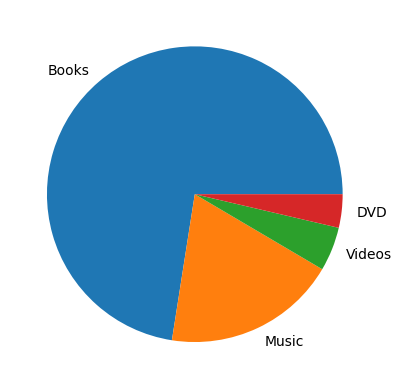

In [129]:
for asin,metadata in products.items():
    if(metadata['Group'] == 'Book'):
        Books[asin] = products[asin]  
    if(metadata['Group'] == 'Music'):
        Music[asin] = products[asin]
    if(metadata['Group'] == 'Video'):
        Videos[asin] = products[asin]
    if(metadata['Group'] == 'DVD'):
        DVD[asin] = products[asin]
print("Videos: ",len(Videos))
print("Books: ",len(Books))
print("Music: ",len(Music))
print("DVD: ",len(DVD))
CategoriesCounter = [len(Books),len(Music),len(Videos),len(DVD)]
plt.pie(CategoriesCounter, labels=["Books","Music","Videos","DVD"])
ax = plt.show()

In [130]:
sorted(Music.items(), key=lambda x: x[1]['Reviews'], reverse=True)[:3]

[('B000084T18',
  {'Id': '384904',
   'Title': "Get Rich or Die Tryin'",
   'Group': 'Music',
   'SalesRank': '722',
   'Categories': 'music rap styles gangsta hip hardcore general hop',
   'Similar': 'B0000TAZS8 B0007P3582 B0000DZFL0 B00006690G B00065XJ52',
   'Reviews': '993',
   'Ratings': 3.5}),
 ('B000088E6Q',
  {'Id': '450089',
   'Title': "Get Rich or Die Tryin'",
   'Group': 'Music',
   'SalesRank': '311166',
   'Categories': 'music rap styles gangsta hip hardcore general hop',
   'Similar': 'B0000TAZS8 B0007P3582 B0000DZFL0 B00006690G B00065XJ52',
   'Reviews': '993',
   'Ratings': 3.5}),
 ('B00005RGNI',
  {'Id': '61614',
   'Title': 'Josh Groban',
   'Group': 'Music',
   'SalesRank': '227',
   'Categories': 'sebastian morricone bach vocalists opera broadway non featured theatrical composers cantatas incidental baroque vocal pop general forms film historical periods johann styles classical program ennio genres works scores music',
   'Similar': 'B0000CFW87 B000077ZIG B00063LTH

In [131]:
sorted(Videos.items(), key=lambda x: x[1]['Reviews'], reverse=True)[:3]

[('0783113145',
  {'Id': '47063',
   'Title': 'A Bronx Tale',
   'Group': 'Video',
   'SalesRank': '34725',
   'Categories': 'vhs criminals urban mystery pesci blackmail life actors sons trouble capra francis family hicks widescreen formats brancato general joe fathers kids age lillo actresses crime coming drama palminteri suspense assassination taral chazz genres murder theme mayhem robert deniro',
   'Similar': 'B000286RKW B00004XPPB 0783225792 B0000AM6JI B0000AMRJC',
   'Reviews': '99',
   'Ratings': 4.5}),
 ('6303514723',
  {'Id': '59242',
   'Title': 'The Langoliers',
   'Group': 'Video',
   'SalesRank': '10303',
   'Categories': 'faison vhs moakler mozart mazzello actors fiction harris morse baxter frankie chapman travel david stephen fantasy directors pinchot general king science mark actresses horror stockwell patricia masters christopher bronson lindsay collet wettig holland genres kate dean theme maberly time tom',
   'Similar': 'B00006AUIN 1573625779 1573624098 B00006FDCD B0

In [32]:
count_df=products_df.groupby(['Group'])['Group'].count()
count_df

Group
                  5868
Baby Product         1
Book            393561
CE                   4
DVD              19828
Music           103144
Software             5
Sports               1
Toy                  8
Video            26131
Video Games          1
Name: Group, dtype: int64

In [33]:
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community

In [34]:
G = nx.Graph()

In [36]:
# Reference： Vishalsha. (n.d.). Vishalsha/Amazon-products-analysis: Analysing the metadata related to Amazon products in python. analysing the probable nodes and edges for graph components. GitHub. Retrieved May 5, 2023, from https://github.com/vishalsha/amazon-products-analysis 
_asin = []
_similar = []
_reviews = []
_ratings = []
for asin,metadata in products.items():
    _asin.append(asin)
    _similar.append(len(metadata['Similar']))
    _reviews.append(metadata['Reviews'])
    _ratings.append(metadata['Ratings'])
dict = {'ASIN':_asin, 'Similar':_similar,'Reviews':_reviews,'Ratings':_ratings}
df = pd.DataFrame(dict)
df.to_csv('nodeList.csv', index = False)

#Preparing the edge list for Graph:
_source = []
_target = []
#_weights = similarity coefficient
for asin,metadata in products.items():
   
    for _asinRest in range(len(metadata['Similar'])):
        _source.append(asin)
        _target.append(metadata['Similar'][_asinRest])
dict = {'Source':_source, 'Target':_target}
df = pd.DataFrame(dict)
df.to_csv('edgeList.csv', index = False)


In [37]:
import csv
node_names = []
edges = []
with open('nodeList.csv', 'r') as nodecsv:
    nodereader = csv.reader(nodecsv)
    nodes = [n for n in nodereader][1:]

# Get a list of just the node names (the first item in each row)
node_names = [n[0] for n in nodes]

# Read in the edgelist file
with open('edgeList.csv', 'r') as edgecsv:
    edgereader = csv.reader(edgecsv)
    edges = [tuple(e) for e in edgereader][1:]

print(len(node_names))
print(len(edges))

548552
19296882


In [38]:
G.add_nodes_from(node_names) 
G.add_edges_from(edges) 
print(nx.info(G))

Graph with 548589 nodes and 4798509 edges


In [132]:
print(nx.is_connected(G))

False


In [40]:
np.mean([d for _, d in G.degree()])

17.49400370769374

In [44]:
import operator

In [48]:
dc = nx.degree_centrality(G)
sorted_dc = sorted(dc.items(), key=operator.itemgetter(1),reverse=True)
sorted_dc

[('0', 0.6882487404026336),
 (' ', 0.6708531721437582),
 ('5', 0.6177058193033752),
 ('2', 0.6171297950374416),
 ('6', 0.6107862366657674),
 ('1', 0.6085623455124792),
 ('4', 0.600778726475971),
 ('3', 0.5910227711871203),
 ('8', 0.5899144713336785),
 ('7', 0.5837295019212961),
 ('9', 0.5737311060395051),
 ('X', 0.2352603410938628),
 ('B', 0.19127651352198735),
 ('A', 0.08106265539895148),
 ('J', 0.07662398740038061),
 ('I', 0.07442561630950731),
 ('C', 0.07132310586451034),
 ('Y', 0.06853595047649602),
 ('G', 0.06840835016442211),
 ('D', 0.06774665140323886),
 ('W', 0.06729458172617701),
 ('M', 0.06579618949010915),
 ('O', 0.0652912568266167),
 ('L', 0.06416837408036632),
 ('Q', 0.06404624235309558),
 ('K', 0.06402254515228185),
 ('E', 0.06351578962718835),
 ('T', 0.0632204860478173),
 ('U', 0.06264446178188367),
 ('S', 0.06244212414416647),
 ('N', 0.06212676908718382),
 ('Z', 0.06165647079411143),
 ('H', 0.06078696581040781),
 ('V', 0.05982267202344929),
 ('R', 0.059388830962398005),

In [49]:
resultList=list(dc.values())
np.max(resultList),np.min(resultList),np.mean(resultList),np.std(resultList)

(0.6882487404026336, 0.0, 3.188914760748274e-05, 0.0028167513063031306)

In [57]:
nx.density(G)


3.1889147607482734e-05

In [55]:
giant_nodes = max(nx.connected_components(G), key=len)
giant_graph = G.subgraph(giant_nodes).copy()
print(giant_graph)

Graph with 379130 nodes and 4798509 edges


In [138]:
nx.density(giant_graph)

6.676689089843261e-05

In [65]:
import nltk
from gensim import corpora, models

In [62]:
all_docs = products_df['Categories'].values
exclude = set(string.punctuation)
tokenized = []

for doc in all_docs:
    tokens = nltk.word_tokenize(doc.lower())
    tokenized.append(''.join([ch for ch in ' '.join(tokens) if ch not in exclude]).split())

In [63]:
tokenized

[[],
 ['sermons',
  'books',
  'preaching',
  'spirituality',
  'religion',
  'christianity',
  'subjects',
  'clergy'],
 ['witchcraft',
  'religions',
  'based',
  'books',
  'spirituality',
  'religion',
  'subjects',
  'wicca',
  'earth'],
 ['hobbies', 'home', 'books', 'garden', 'subjects', 'crafts', 'general'],
 ['testament',
  'life',
  'christianity',
  'christian',
  'bibles',
  'history',
  'reference',
  'texts',
  'general',
  'guides',
  'books',
  'bible',
  'religion',
  'translations',
  'study',
  'commentaries',
  'discipleship',
  'sacred',
  'spirituality',
  'living',
  'subjects',
  'new',
  'application'],
 ['business',
  'christian',
  'books',
  'spirituality',
  'religion',
  'christianity',
  'devotion',
  'living',
  'worship',
  'prayerbooks',
  'subjects'],
 ['jewish',
  'urban',
  'united',
  'camera',
  'nonfiction',
  'sociology',
  'arts',
  'history',
  'states',
  'categories',
  'general',
  'sciences',
  'books',
  'social',
  'photography',
  'photo

In [66]:
dictionary = corpora.Dictionary(tokenized)
dictionary.filter_extremes(no_below=5, no_above=0.3)
dictionary.compactify()


In [69]:
print(dictionary.token2id)

{'christianity': 0, 'clergy': 1, 'preaching': 2, 'religion': 3, 'sermons': 4, 'spirituality': 5, 'based': 6, 'earth': 7, 'religions': 8, 'wicca': 9, 'witchcraft': 10, 'crafts': 11, 'garden': 12, 'hobbies': 13, 'home': 14, 'application': 15, 'bible': 16, 'bibles': 17, 'christian': 18, 'commentaries': 19, 'discipleship': 20, 'guides': 21, 'history': 22, 'life': 23, 'living': 24, 'new': 25, 'reference': 26, 'sacred': 27, 'study': 28, 'testament': 29, 'texts': 30, 'translations': 31, 'business': 32, 'devotion': 33, 'prayerbooks': 34, 'worship': 35, 'americas': 36, 'arts': 37, 'camera': 38, 'categories': 39, 'essays': 40, 'jewish': 41, 'nonfiction': 42, 'photo': 43, 'photography': 44, 'sciences': 45, 'social': 46, 'sociology': 47, 'states': 48, 'united': 49, 'urban': 50, 'imports': 51, 'jazz': 52, 'modern': 53, 'music': 54, 'postbebop': 55, 'specialty': 56, 'stores': 57, 'styles': 58, 'crime': 59, 'criminals': 60, 'criminology': 61, 'gay': 62, 'lesbian': 63, 'politics': 64, 'baking': 65, 'b

In [70]:
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

In [75]:
corpus= [dictionary.doc2bow(text) for text in tokenized]

In [76]:
print(corpus[1])

[(0, 1), (1, 1), (2, 1), (3, 1)]


In [78]:
ldamodel = models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)

In [79]:
ldamodel.print_topics(num_topics=5, num_words=5)

[(0,
  '0.074*"stores" + 0.073*"com" + 0.073*"amazon" + 0.051*"categories" + 0.045*"outlet"'),
 (1,
  '0.038*"special" + 0.035*"genres" + 0.035*"features" + 0.033*"dvd" + 0.028*"titles"'),
 (2,
  '0.060*"music" + 0.055*"fiction" + 0.049*"styles" + 0.041*"literature" + 0.031*"stores"')]

In [80]:
amazon_music = {}
for asin,metadata in products.items():
    if(metadata['Group'] == 'Music'):
        amazon_music[asin] = products[asin]

    
amazon_music_df = pd.DataFrame.from_dict(amazon_music)
amazon_music_df = amazon_music_df.transpose()

In [81]:
amazon_music_df

,Id,Title,Group,SalesRank,Categories,Similar,Reviews,Ratings
B00000AU3R,7,Batik,Music,5392,general styles specialty modern stores postbeb...,B00002616C B0000261KX B00006AM8D B000059OB9 B0...,3,4.5
B00004W1W1,14,Later...,Music,390624,general styles specialty indie stores music jazz,,0,0.0
B000007R0T,18,Sol to Soul,Music,109301,music general styles jazz,B000059QC1 B00000JQIE B00029J1X6 B0006TRO68 B0...,15,5.0
B00005NTSV,22,Come What May,Music,83369,general styles vocal specialty vocalists store...,B00000JCDS B000004CSZ B00016XN6Q B00005LLY3 B0...,4,4.5
B000002O8D,34,Southern By the Grace of God: Lynyrd Skynyrd T...,Music,89264,classic music arena albums southern blues albu...,B0000061RJ B000294SBQ B000001Y9Z B000002IRC B0...,6,4.0
...,...,...,...,...,...,...,...,...
B00005AUTO,548509,Door Door,Music,-1,wave music alternative rock post punk styles new,,1,5.0
B00004XT2L,548536,Improvisations - Jazz In Paris,Music,0,music styles swing general jazz,B000051TKB B0000046U5 B000000EC9 B00000616B B0...,3,5.0
B000065AHM,548544,Lucky Man,Music,0,general blues styles specialty contemporary st...,B00021YIE6,1,5.0
B0000508ZN,548545,I Need Your Loving,Music,0,general styles specialty dance stores indie mu...,,1,1.0


In [82]:
len(amazon_music_df)

103144

In [110]:
all_docs_music = amazon_music_df['Categories'].values
exclude = set(string.punctuation)
tokenized_music = []

for doc in all_docs_music:
    tokens_music = nltk.word_tokenize(doc.lower())
    tokenized_music.append(''.join([ch for ch in ' '.join(tokens_music) if ch not in exclude]).split())

In [111]:
dictionary_music = corpora.Dictionary(tokenized_music)
dictionary_music.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

In [112]:
corpus_music= [dictionary_music.doc2bow(text) for text in tokenized_music]

In [113]:
print(corpus_music[1])

[(1, 1), (4, 1), (5, 1)]


In [115]:
ldamodel_music = models.ldamodel.LdaModel(corpus_music, num_topics=3, id2word=dictionary_music, passes=20)

In [116]:
ldamodel_music.print_topics(num_topics=5, num_words=5)

[(0,
  '0.081*"specialty" + 0.071*"indie" + 0.052*"rock" + 0.039*"pop" + 0.032*"alternative"'),
 (1,
  '0.049*"categories" + 0.049*"travel" + 0.047*"formats" + 0.047*"amazon" + 0.047*"com"'),
 (2,
  '0.058*"classical" + 0.042*"featured" + 0.041*"composers" + 0.037*"works" + 0.031*"historical"')]

In [142]:
pyLDAvis.enable_notebook()
lda_viz_music = gensimvis.prepare(ldamodel_music, corpus_music, dictionary_music)
lda_viz_music

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.192856  0.209759       1        1  45.052619
1     -0.212338 -0.203141       2        1  27.679198
2      0.405194 -0.006618       3        1  27.268183, topic_info=         Term          Freq         Total Category  logprob  loglift
4   specialty  36144.000000  36144.000000  Default  30.0000  30.0000
5       indie  31520.000000  31520.000000  Default  29.0000  29.0000
35  classical  15638.000000  15638.000000  Default  28.0000  28.0000
71    formats  12967.000000  12967.000000  Default  27.0000  27.0000
78      today  11572.000000  11572.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
9       vocal   6127.614504  12817.644373   Topic3  -3.7826   0.5614
46      label   1750.627394   5788.747817   Topic3  -5.0355   0.1035
47     labels   1750.627394   5788.747817   Topic3  -5.0355   0.1035
21     amazon   1884.660116  27461.828043   Topic3  -4.9617  -1.3796
26        com   1884.660116  27461.828043   Topic3  -4.9617  -1.3796

[168 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
62        1  0.999893          age
11        2  0.999776        album
101       1  0.999944  alternative
21        1  0.463917       amazon
21        2  0.467449       amazon
...     ...       ...          ...
9         3  0.478091        vocal
10        1  0.866643    vocalists
10        2  0.133240    vocalists
181       1  0.999532         wave
54        3  0.999942        works

[162 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

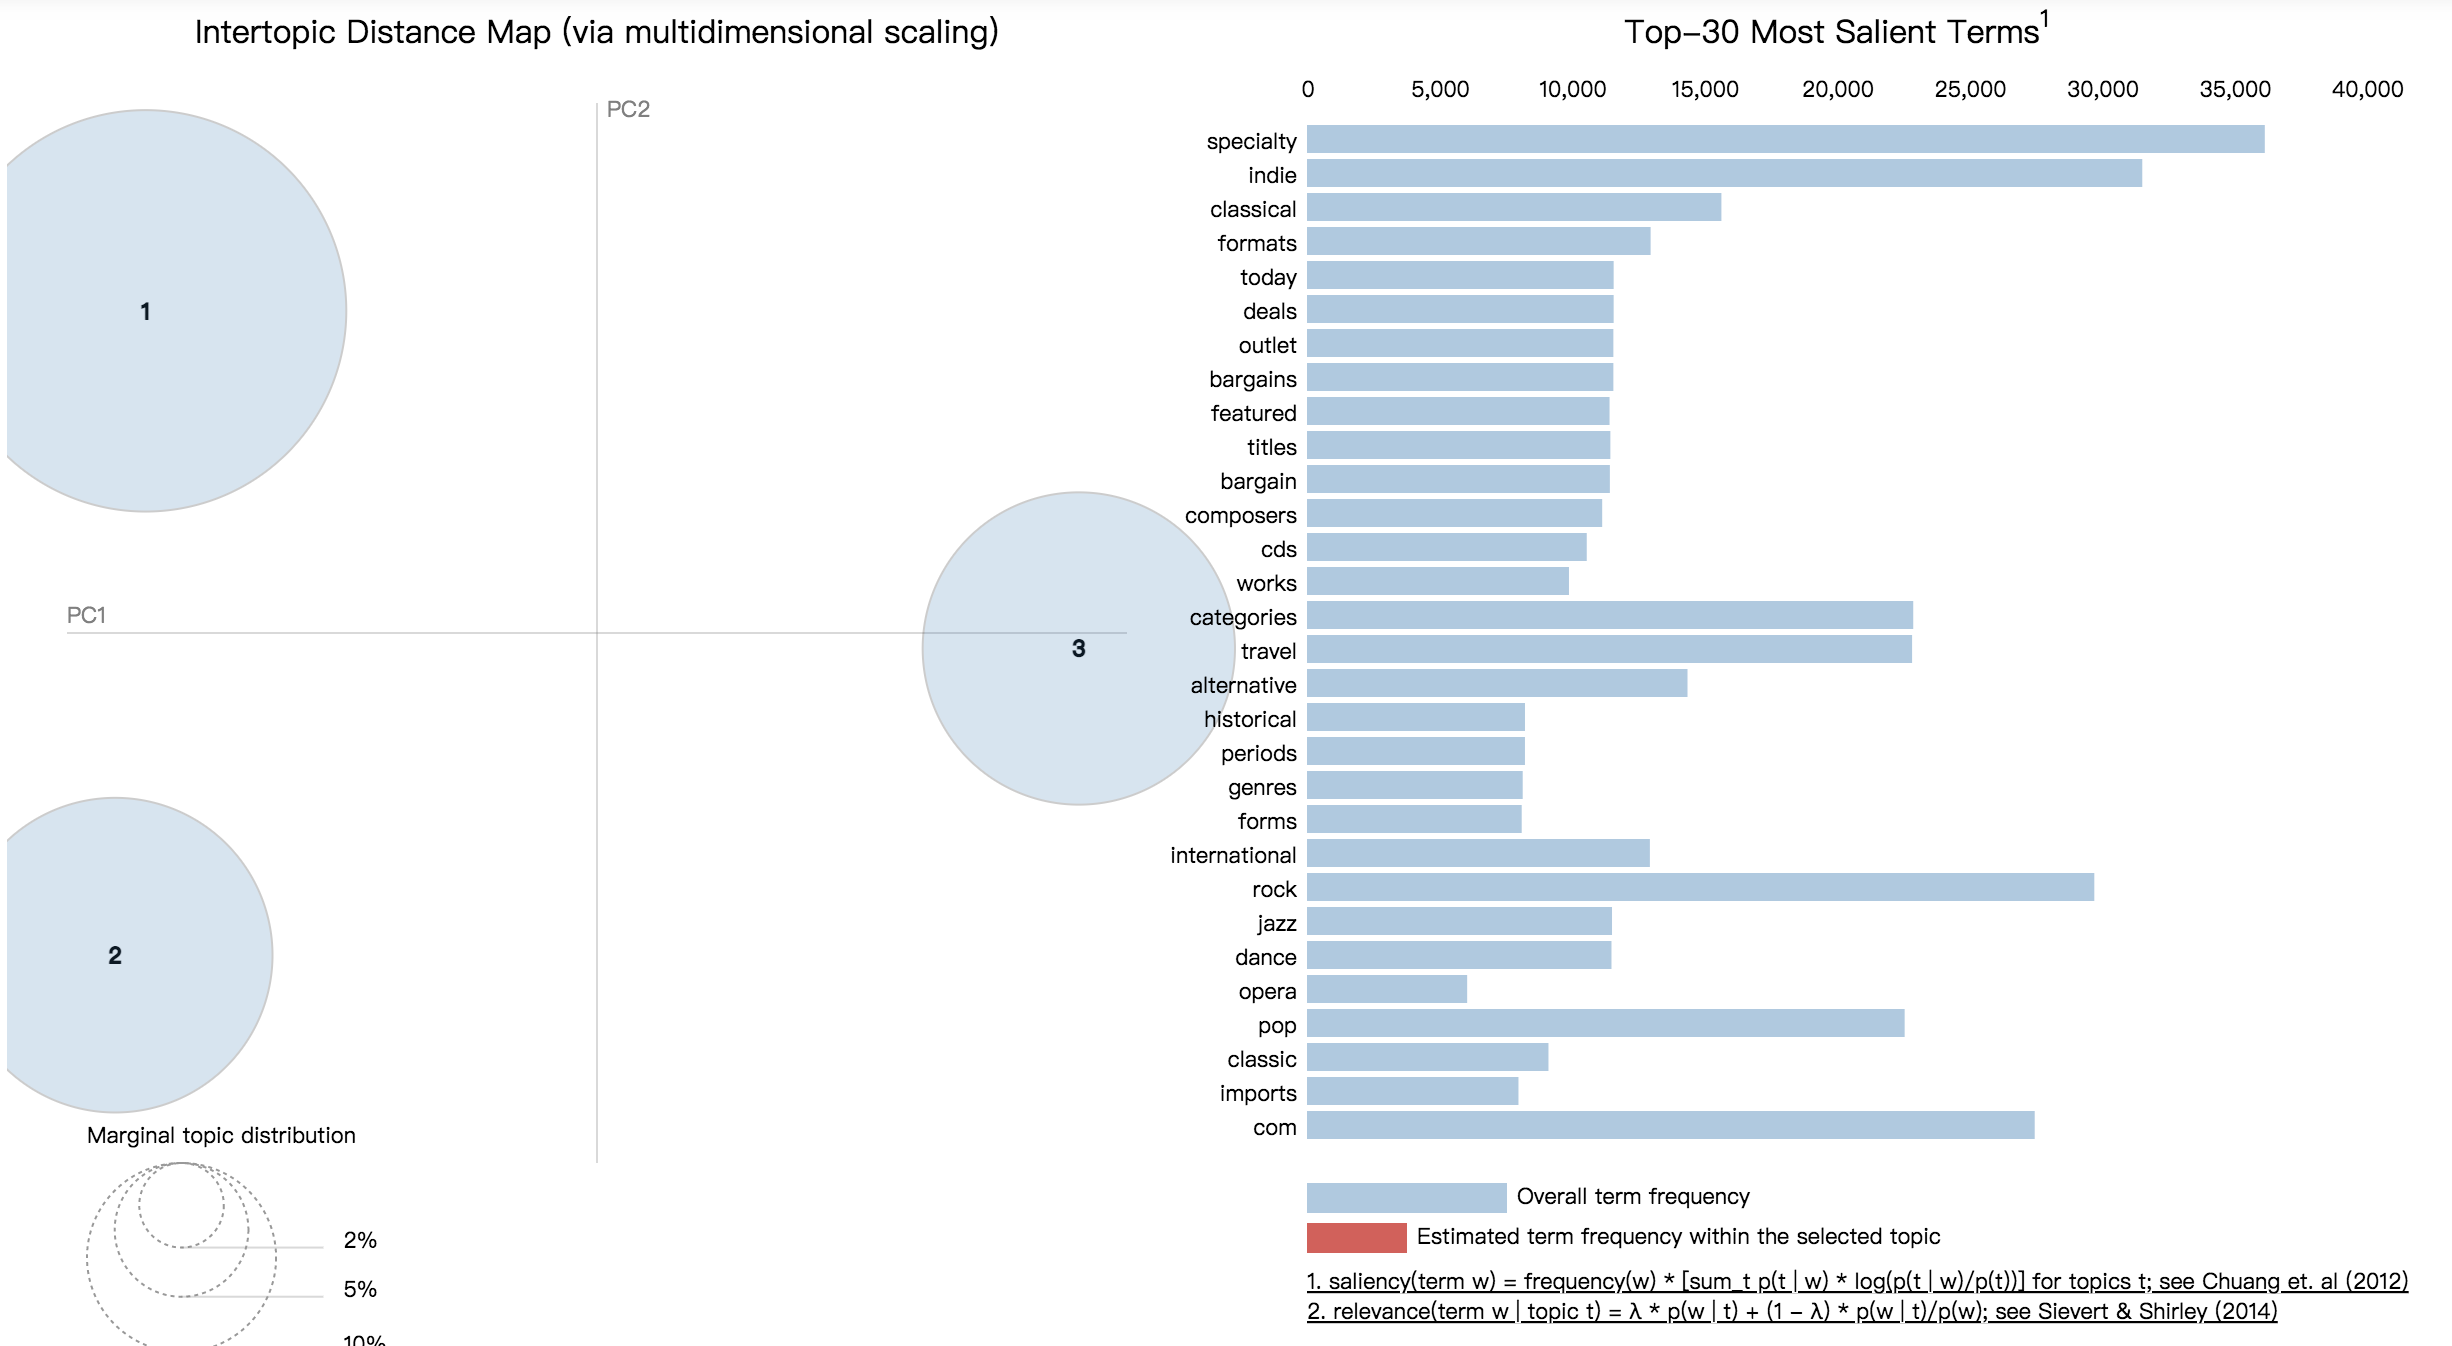

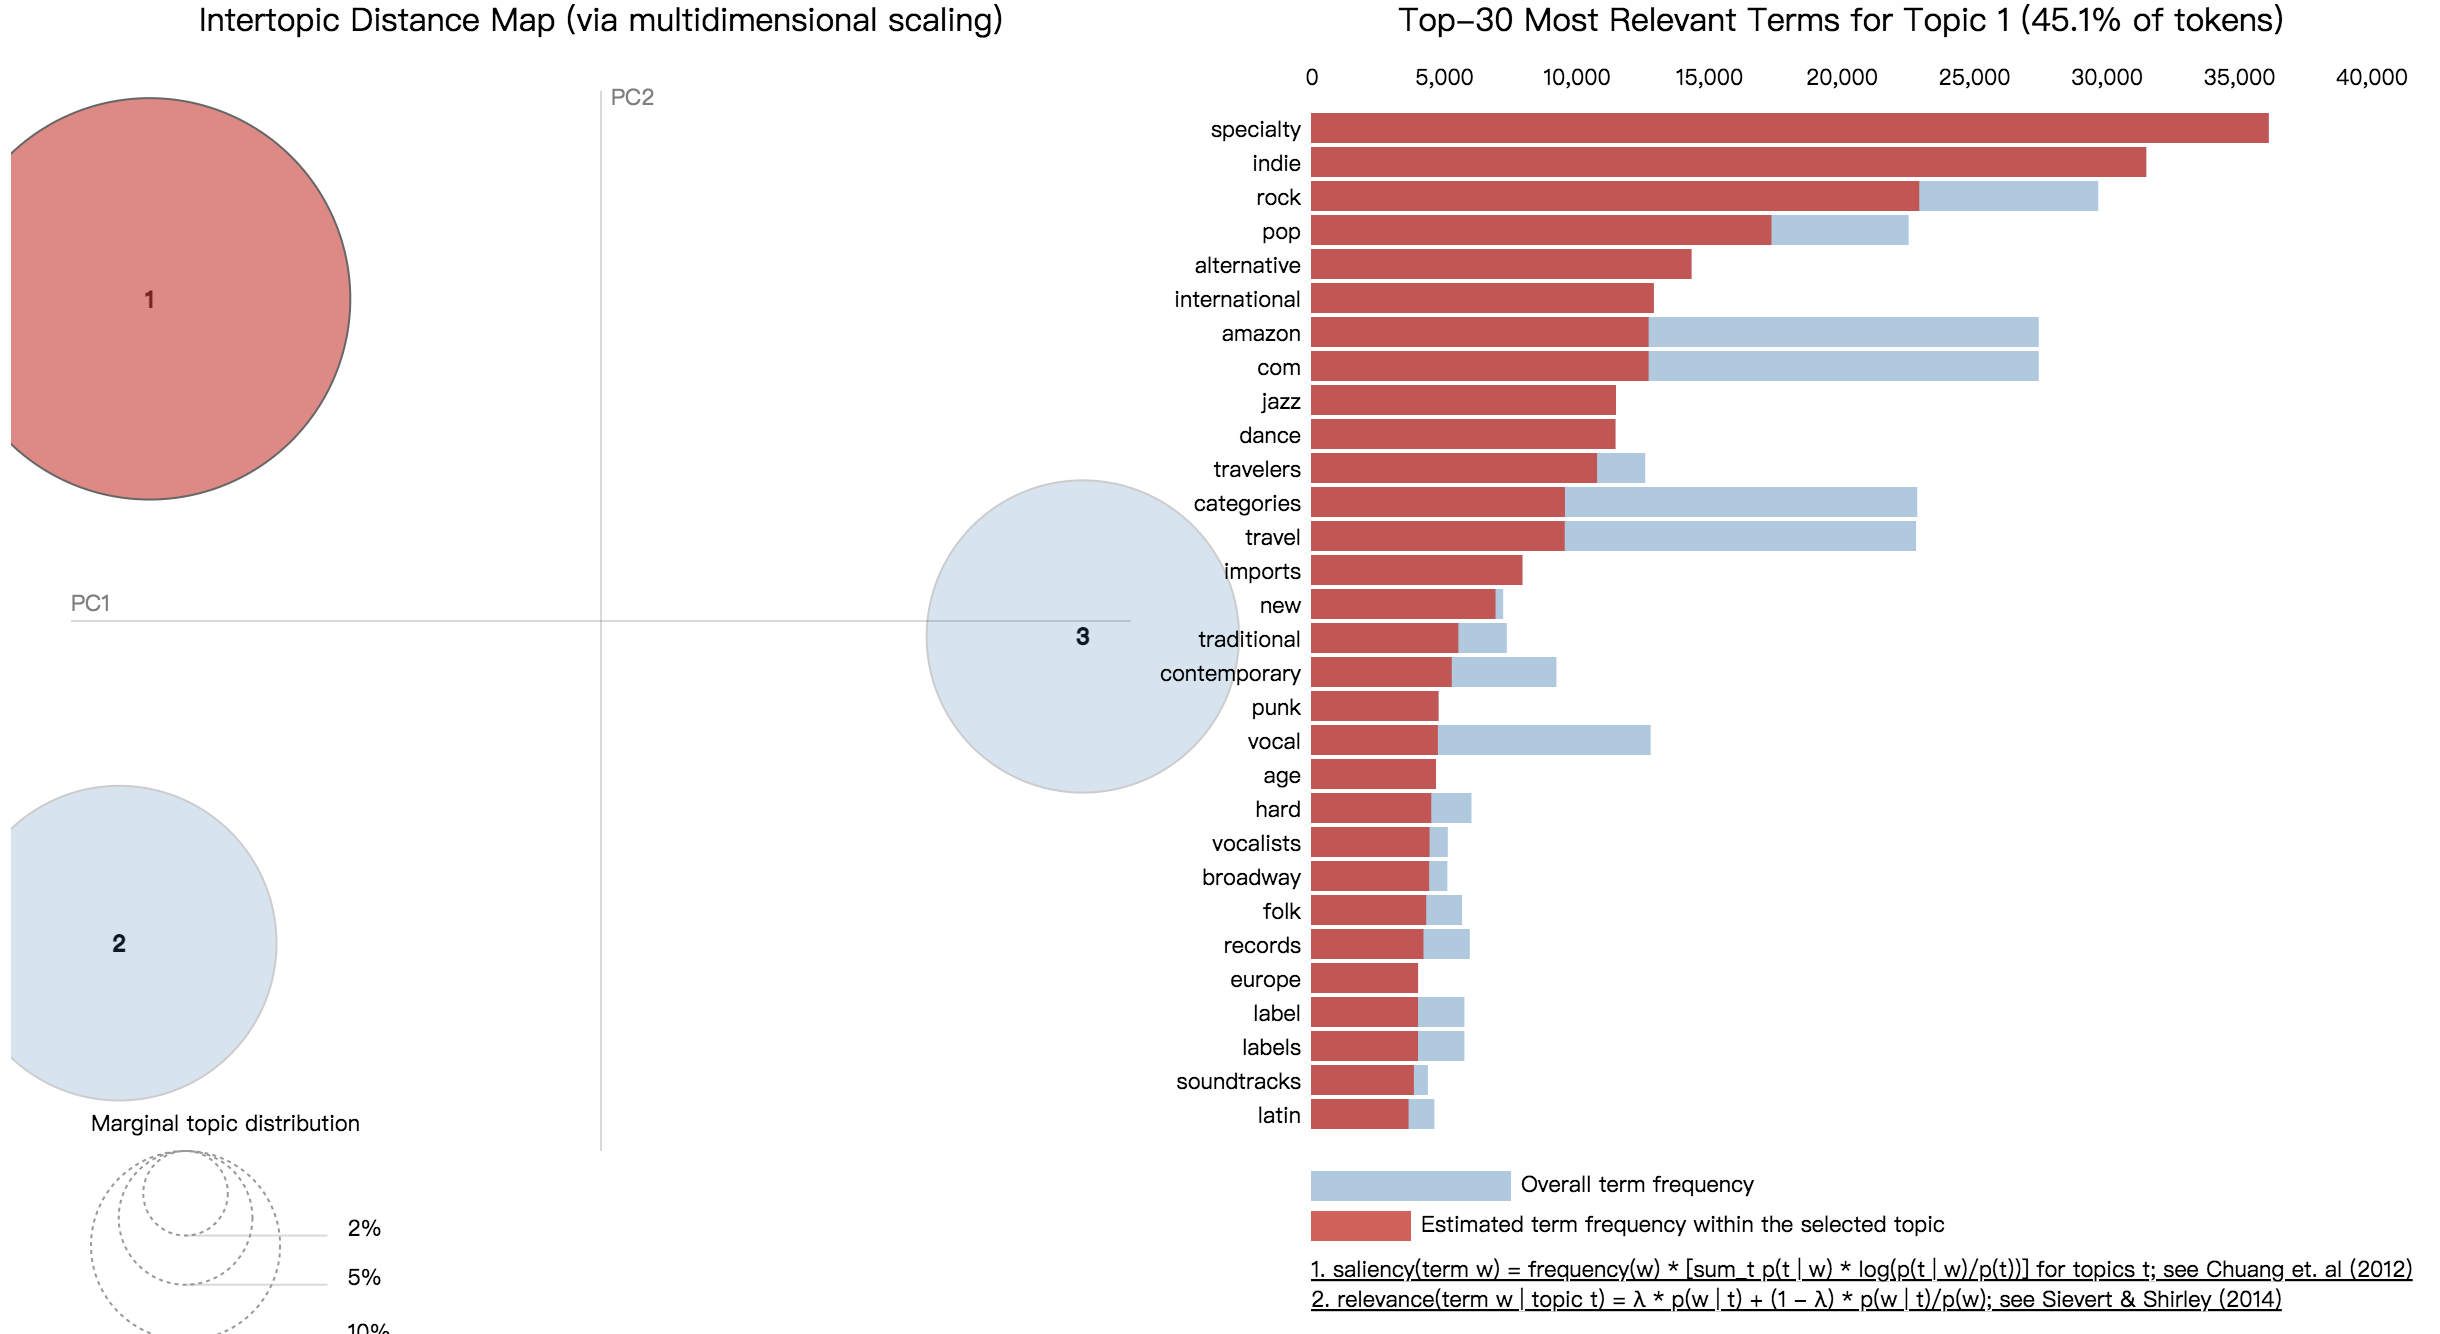

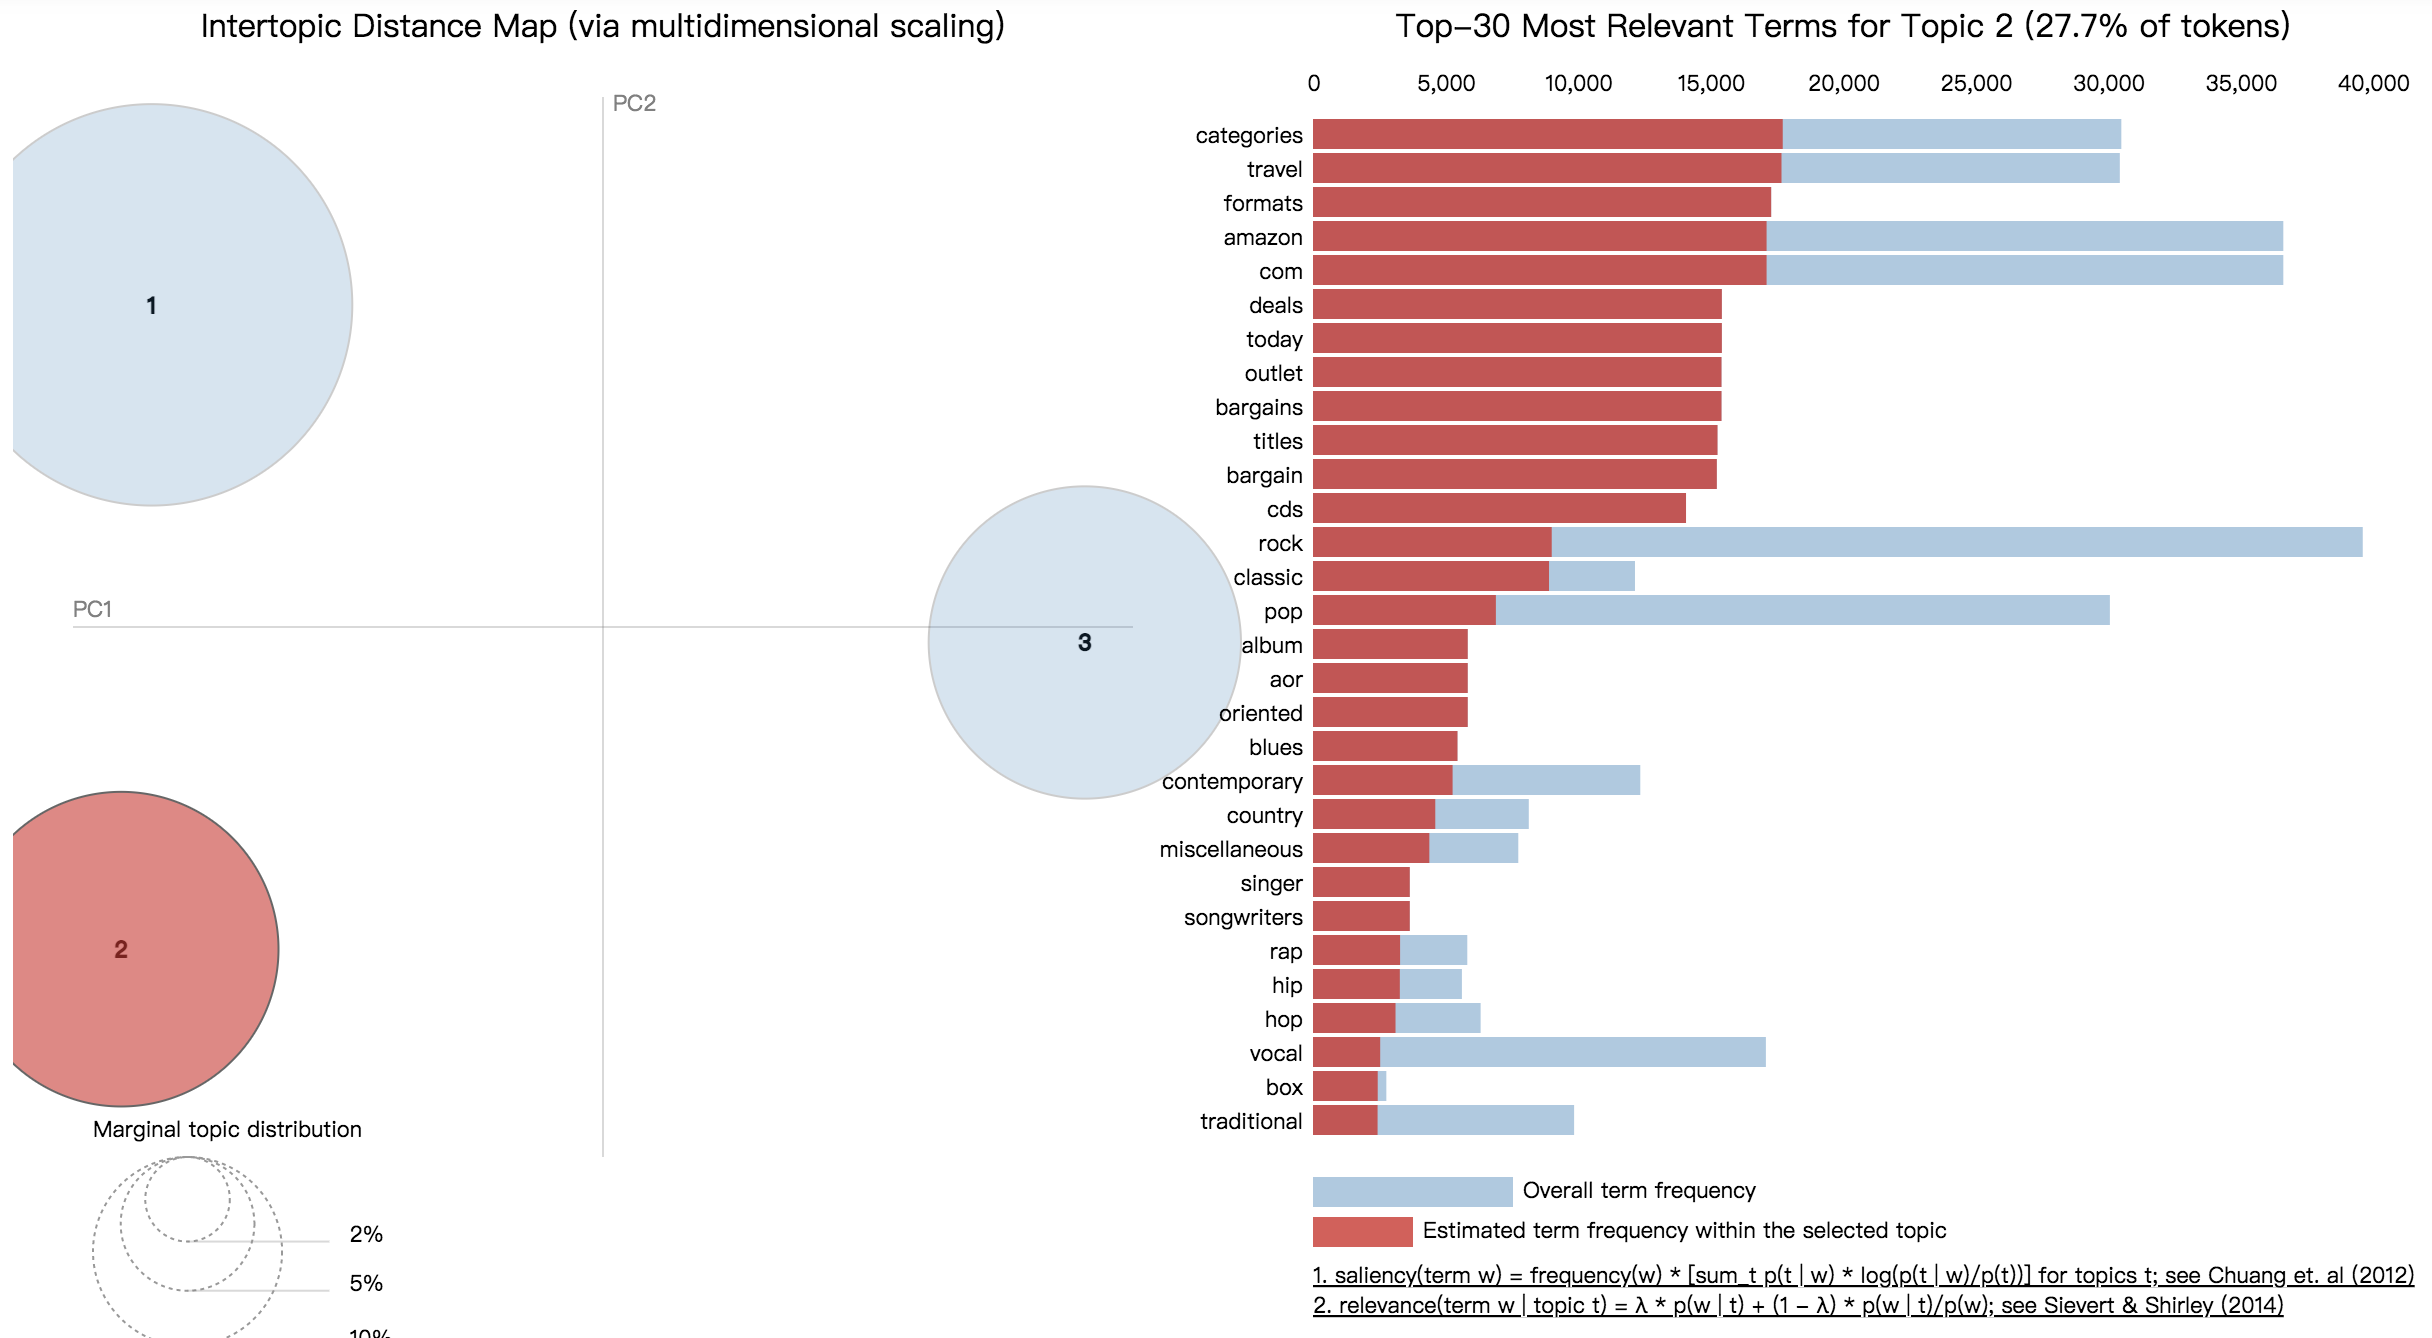

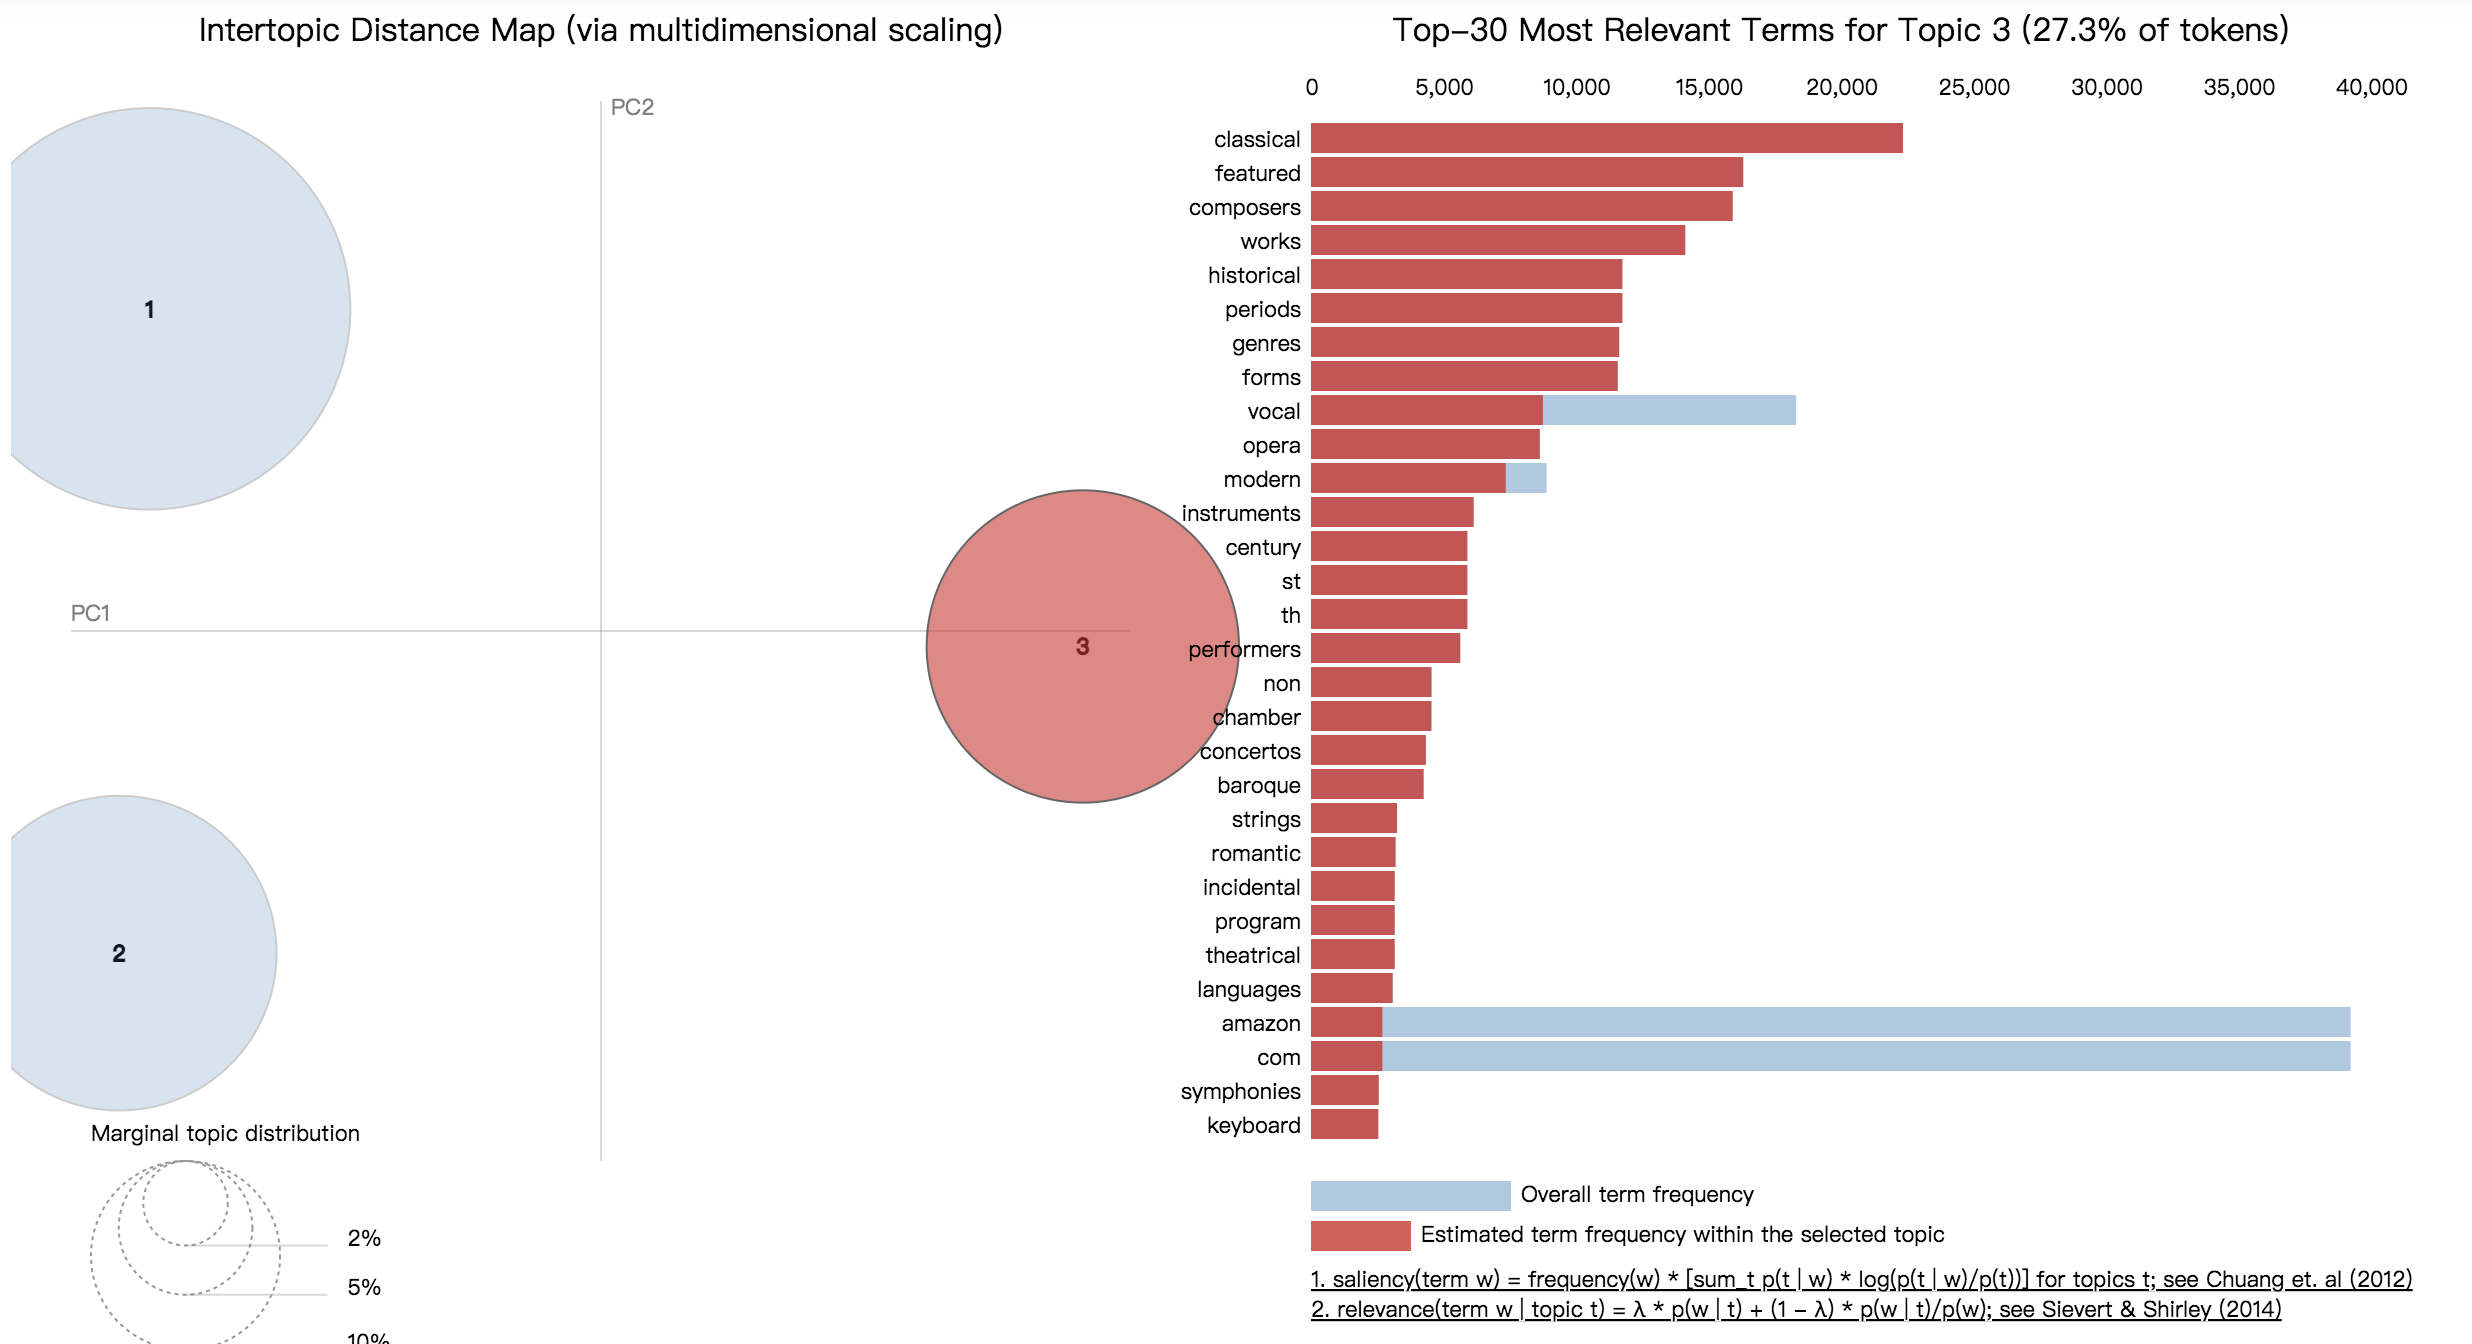

In [89]:
amazon_video = {}
for asin,metadata in products.items():
    if(metadata['Group'] == 'Video'):
        amazon_video[asin] = products[asin]

    
amazon_video_df = pd.DataFrame.from_dict(amazon_video)
amazon_video_df = amazon_video_df.transpose()
amazon_video_df

,Id,Title,Group,SalesRank,Categories,Similar,Reviews,Ratings
6303360041,59,None But the Lonely Heart,Video,13524,barry vhs psychological bohnen life dan actors...,B00000JRW5 630290899X B0000DD780 B000083C8K B0...,5,4.0
B0000060T5,71,Jonny Quest - Bandit in Adventures Best Friend,Video,21571,general vhs characters kids cartoon network ge...,6303953344 630395331X 6303953328 6303953301 63...,2,5.0
6304286961,81,The Doors,Video,10217,stone maclachlan vhs mazzello outlet video fra...,0783233485 0679726225 6305603847 1592400647 06...,167,4.0
B000063W82,84,The Best of Schoolhouse Rock! - 30th Anniversa...,Video,780,disney vhs video specialty actors sheldon year...,156949407X B0000033XO 1569494096 B0000033XL B0...,14,4.5
B0000060TP,124,Dink the Little Dinosaur: Shyler's Friend,Video,25127,vhs bargains outlet video specialty features a...,6303192084 6303192092 6303192076 6303192041 63...,2,4.5
...,...,...,...,...,...,...,...,...
6300147738,544010,They Came From Beyond Space,Video,54270,vhs actors fiction gough hutton freddie franci...,B0002V7O2Y B00006SFIY B00005R1O7 B000063UR0 B0...,13,3.5
6303315275,548495,Rockers,Video,8211,music vhs rock video genres roll concerts regg...,B0000714F2 B00009MECG B00006AWBH 6305789797 63...,10,5.0
6302011019,548499,Beyond the Forest,Video,10141,ruth vhs minor actors dona drake david classic...,6301973313 B000055XM8 B0006HBV2I 630160086X B0...,18,4.5
6300186016,548506,She Done Him Wrong,Video,10938,beavers vhs criminals moakler lee mozart knigh...,6305077622 6305078203 6300181294 6305078262 63...,13,4.5


In [90]:
all_docs = amazon_video_df['Categories'].values
exclude = set(string.punctuation)
tokenized = []

for doc in all_docs:
    tokens = nltk.word_tokenize(doc.lower())
    tokenized.append(''.join([ch for ch in ' '.join(tokens) if ch not in exclude]).split())

In [91]:
dictionary = corpora.Dictionary(tokenized)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

In [92]:
corpus= [dictionary.doc2bow(text) for text in tokenized]

In [93]:
print(corpus[1])

[(6, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)]


In [94]:
ldamodel = models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)

In [95]:
ldamodel.print_topics(num_topics=5, num_words=5)

[(0,
  '0.037*"directors" + 0.025*"theme" + 0.024*"drama" + 0.016*"comedy" + 0.015*"specials"'),
 (1,
  '0.064*"video" + 0.060*"com" + 0.060*"amazon" + 0.059*"categories" + 0.056*"outlet"'),
 (2,
  '0.059*"kids" + 0.059*"family" + 0.045*"special" + 0.043*"interests" + 0.042*"series"')]

In [141]:
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(ldamodel, corpus, dictionary)
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.157624  0.261672       1        1  53.726241
1     -0.162808 -0.258865       2        1  25.881657
2      0.320433 -0.002807       3        1  20.392103, topic_info=          Term         Freq        Total Category  logprob  loglift
32         com  6545.000000  6545.000000  Default  30.0000  30.0000
26      amazon  6545.000000  6545.000000  Default  29.0000  29.0000
31  categories  6438.000000  6438.000000  Default  28.0000  28.0000
46      outlet  6092.000000  6092.000000  Default  27.0000  27.0000
37    features  6091.000000  6091.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
63      titles  1308.128885  3779.702468   Topic3  -4.1848   0.5290
59        home  1378.124254  4659.883742   Topic3  -4.1327   0.3718
54       video  1338.481739  9360.782507   Topic3  -4.1619  -0.3550
73       music   791.066106  2687.374127   Topic3  -4.6878   0.3671
68      studio   792.183573  4124.609243   Topic3  -4.6864  -0.0599

[175 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
103       1  0.697762      action
103       2  0.302150      action
104       1  0.600438   adventure
104       2  0.399207   adventure
26        2  0.999958      amazon
...     ...       ...         ...
75        3  0.999372      videos
603       1  0.999355  widescreen
525       2  0.997818     winrich
548       2  0.995635   wrestling
23        3  0.999585       years

[176 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

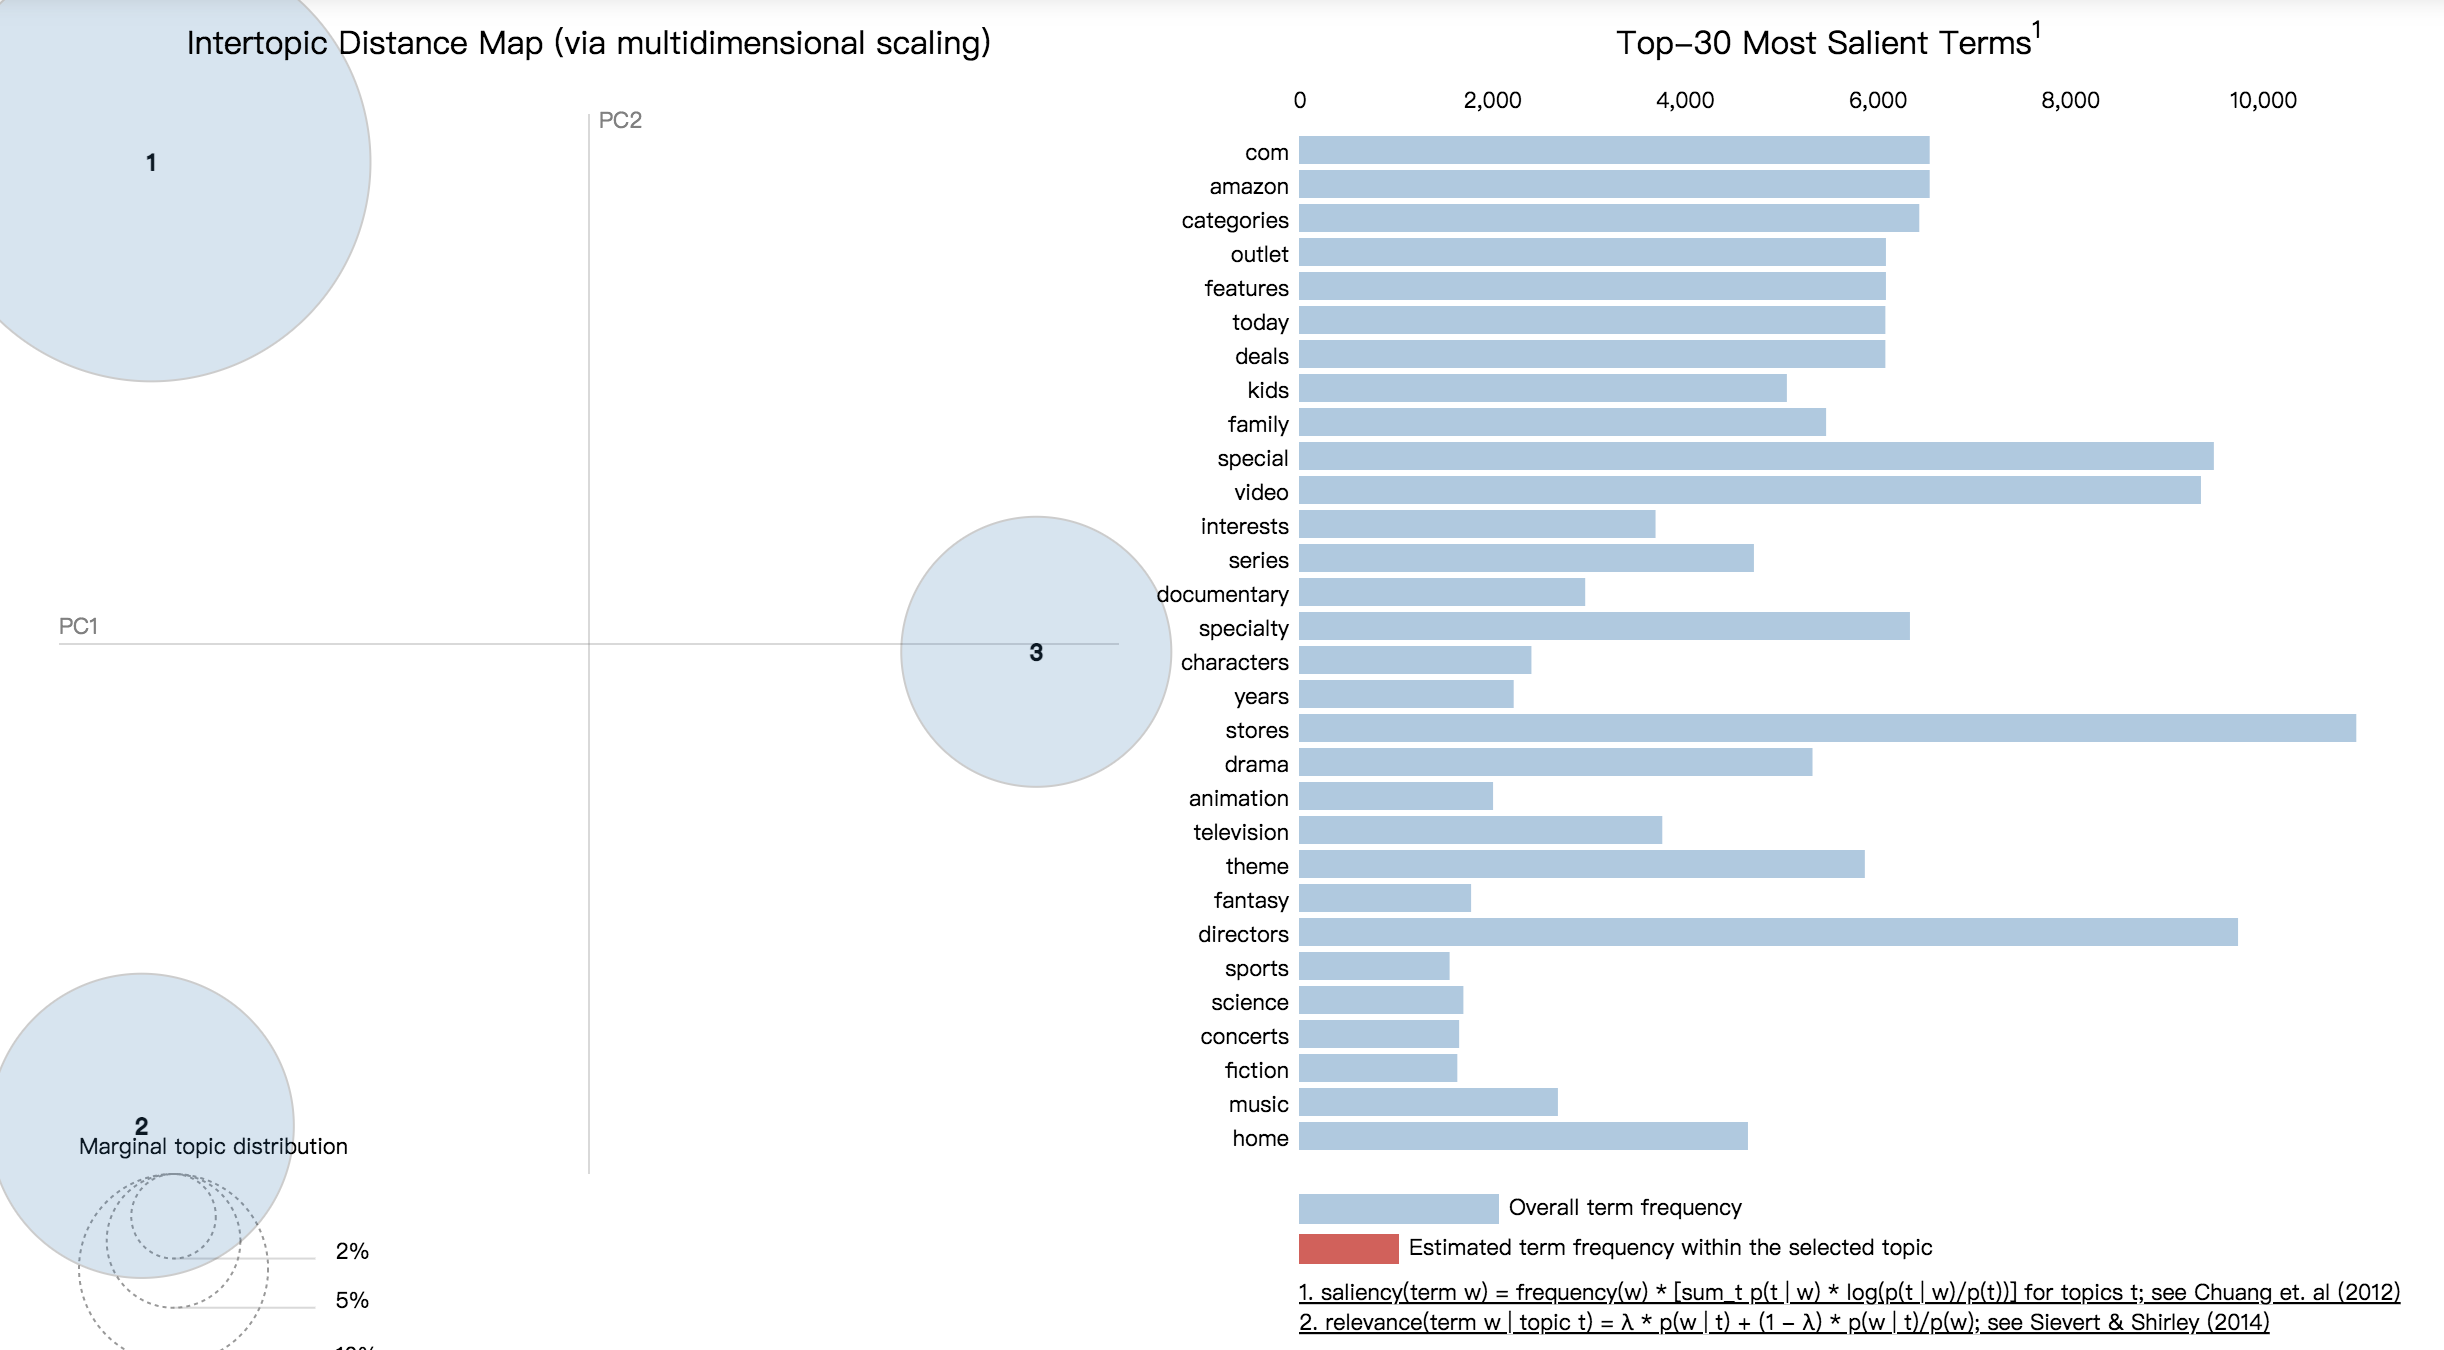

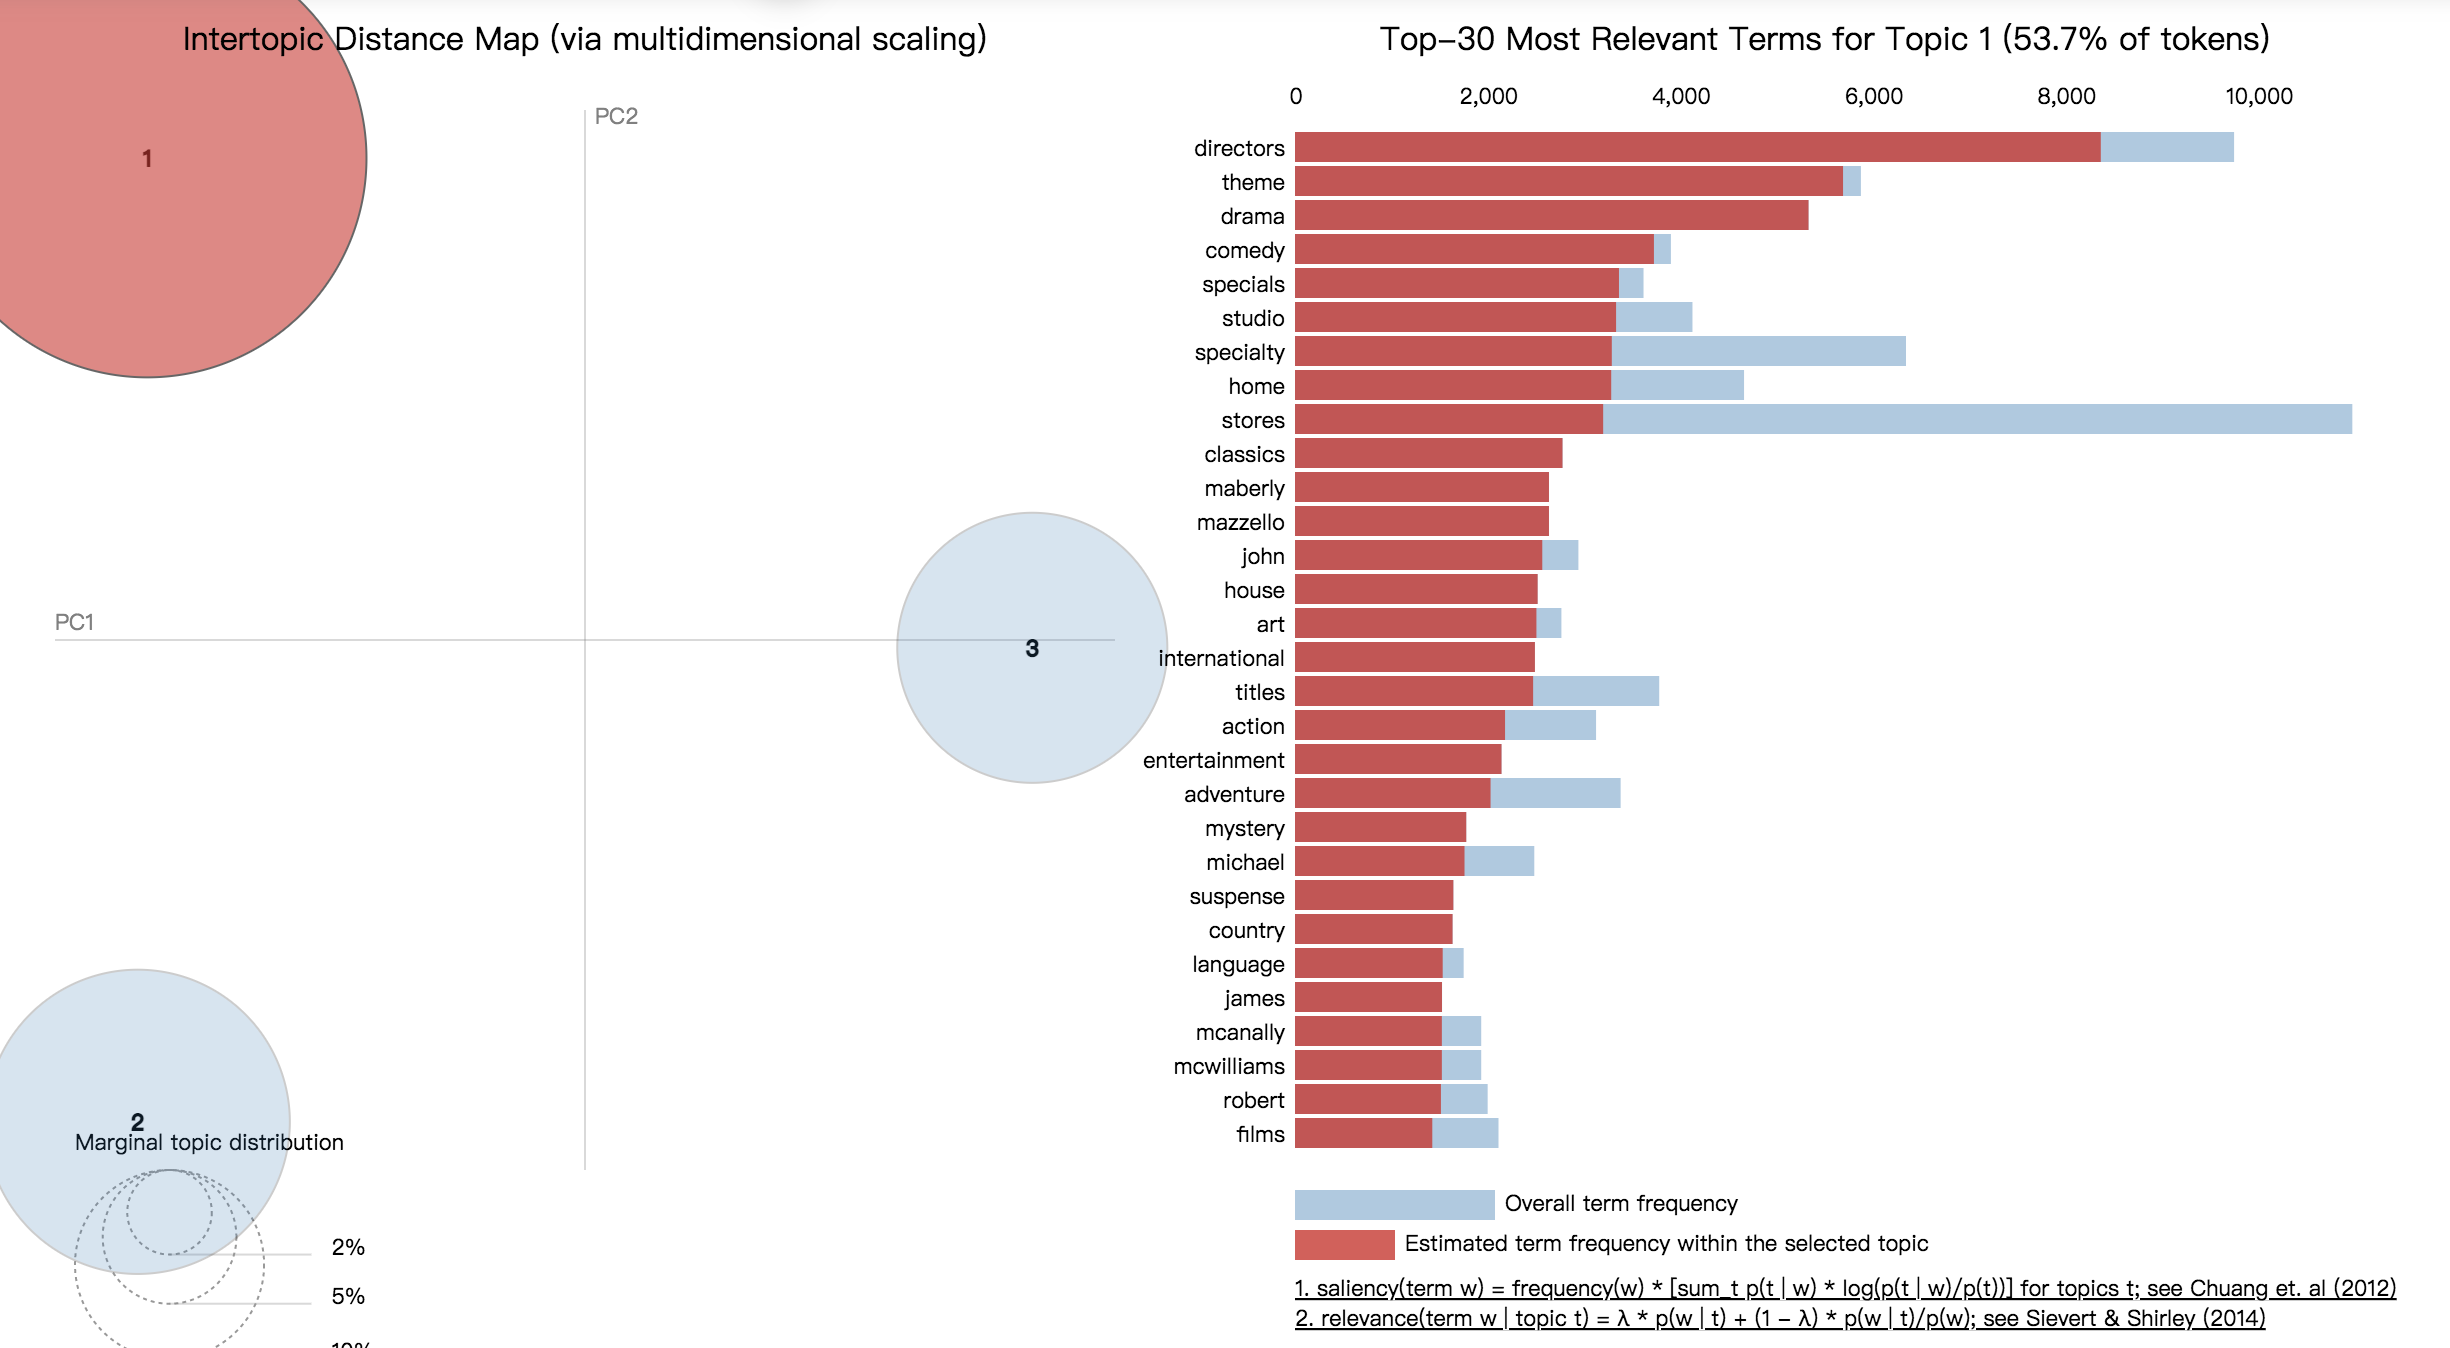

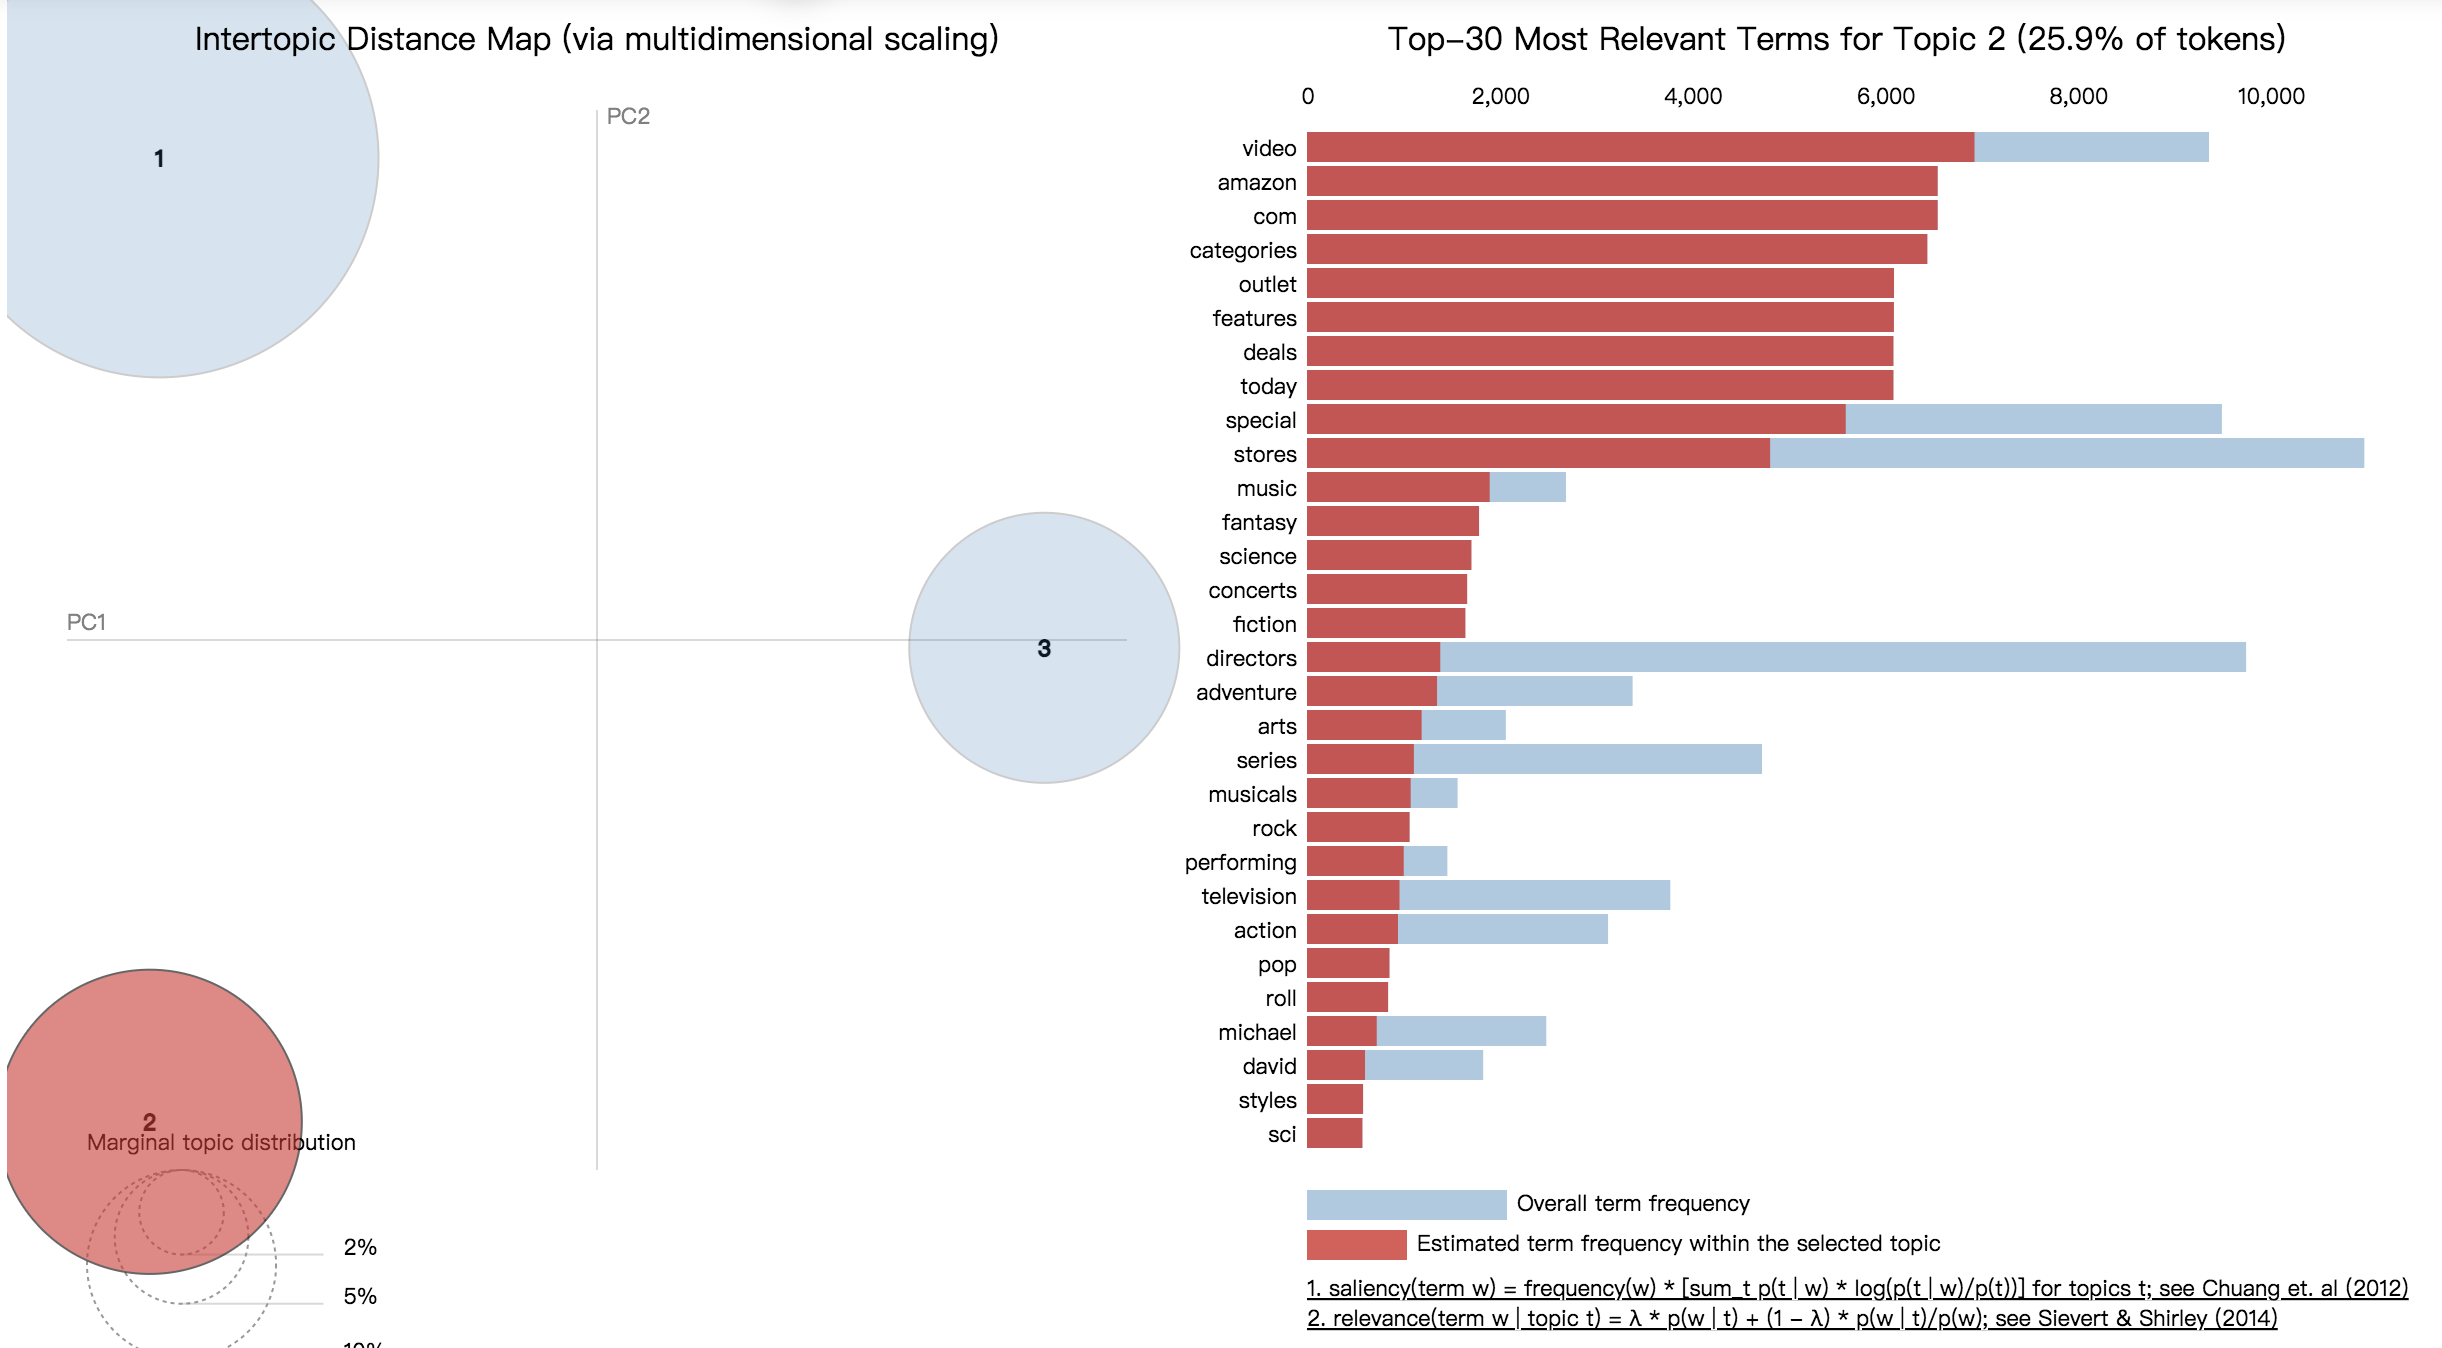

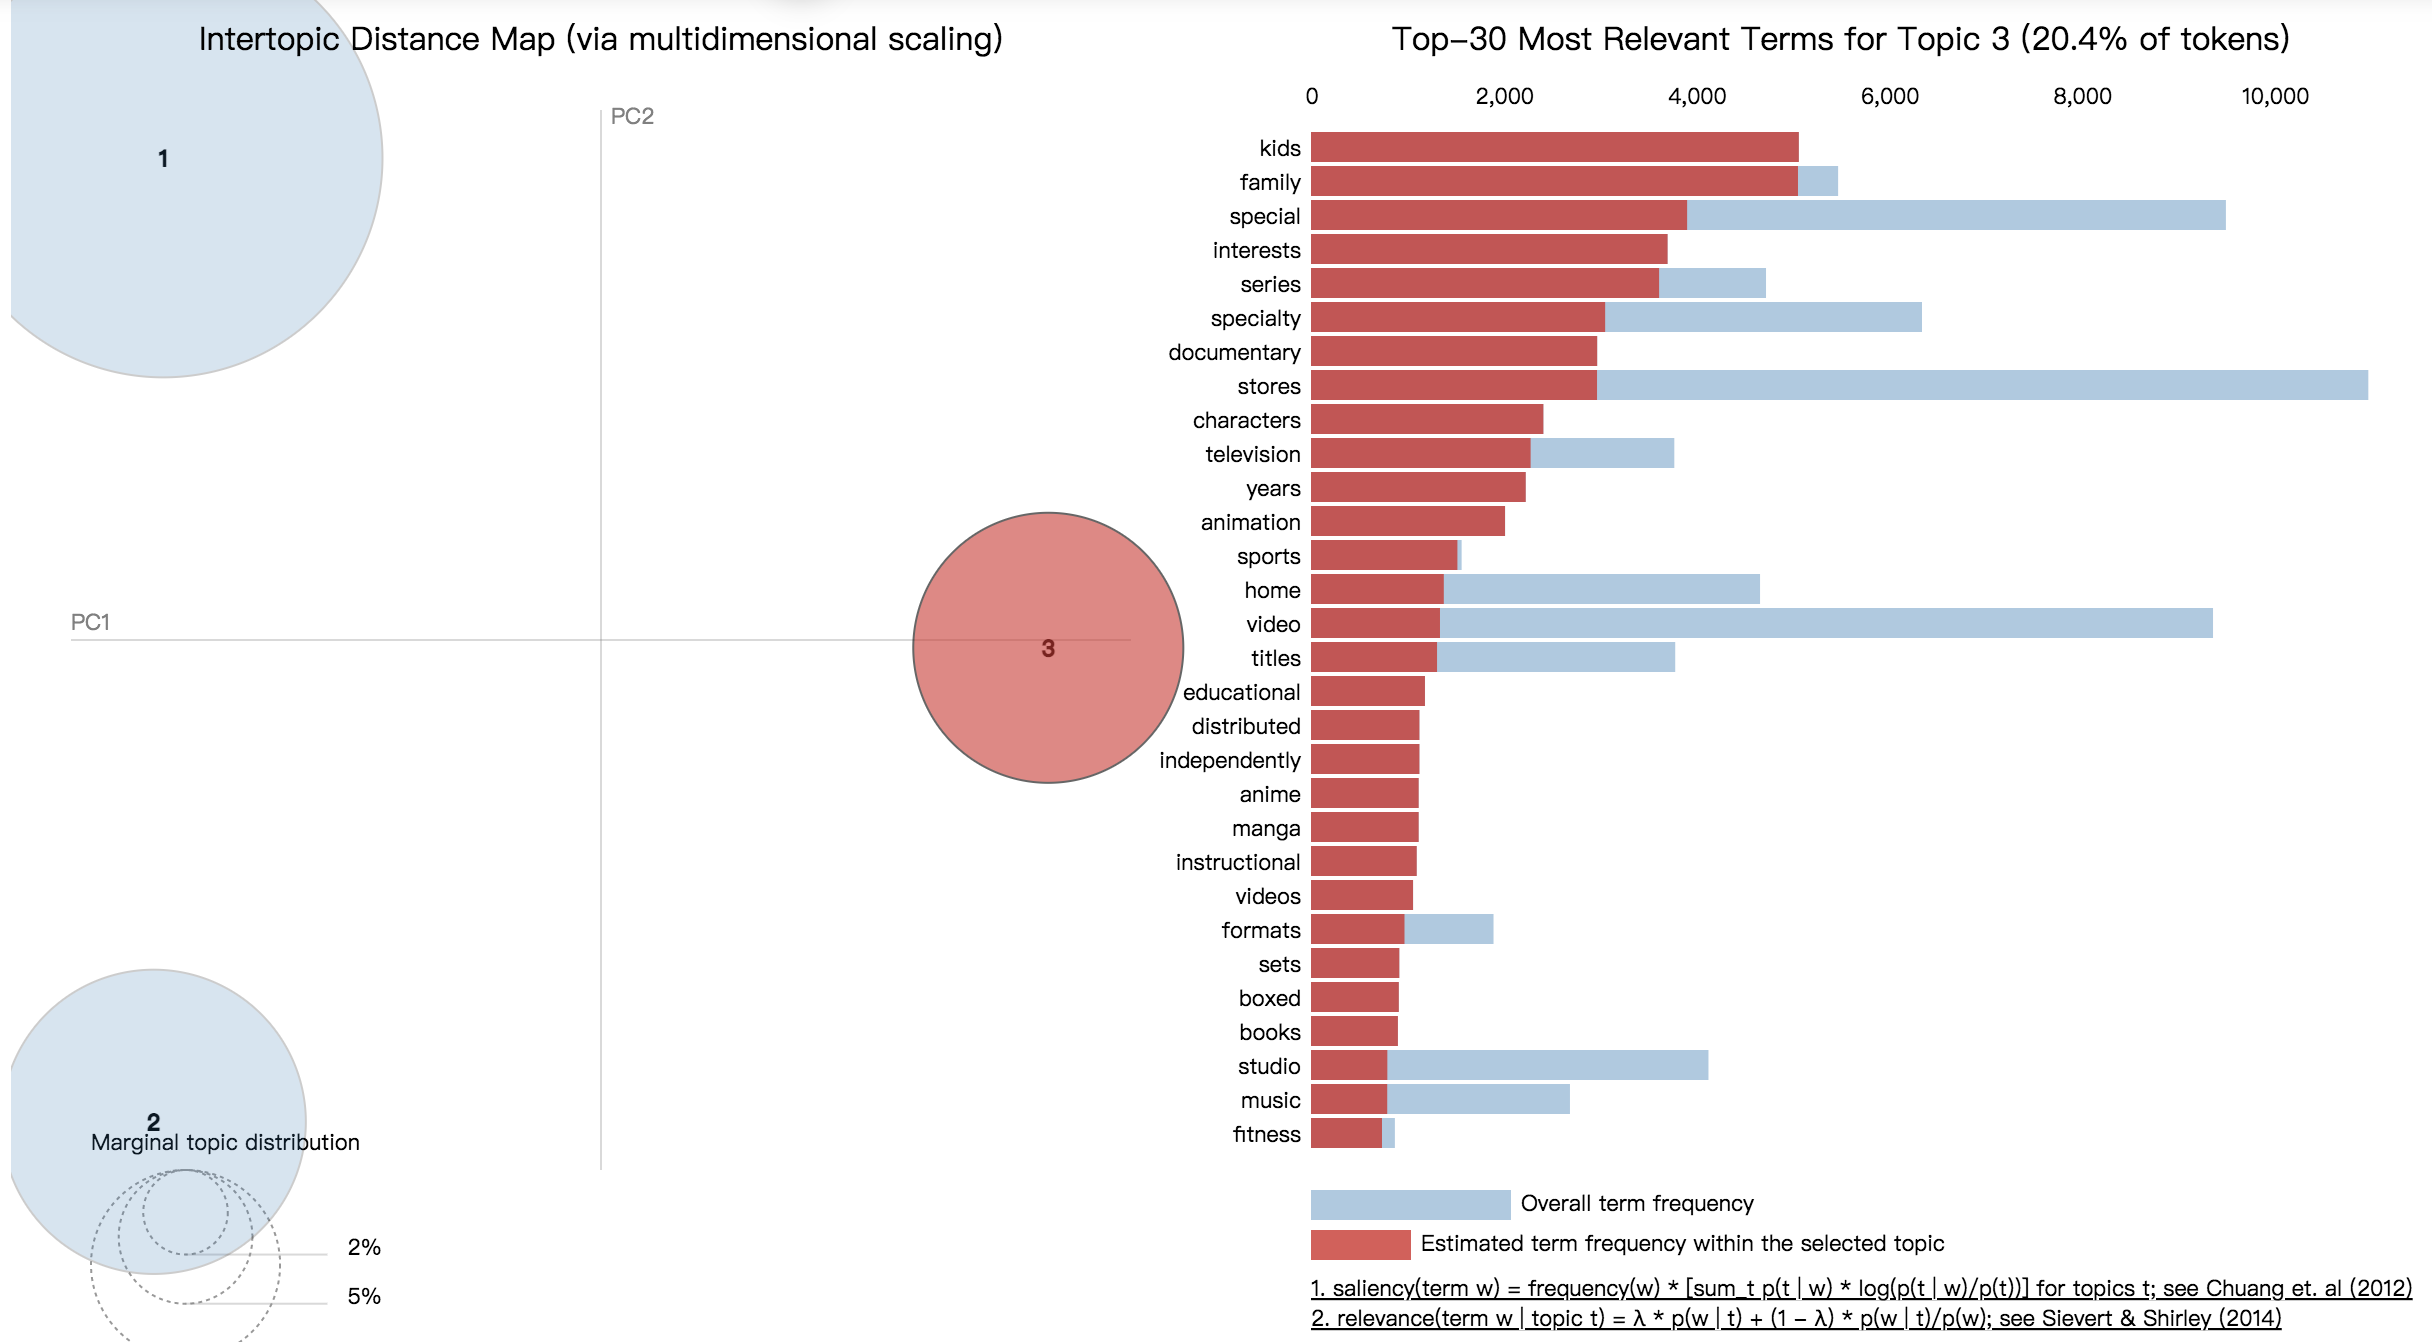

In [103]:
!pip install pyLDAvis
import pyLDAvis

In [108]:
import pyLDAvis.gensim_models as gensimvis